In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('parkinsons_updrs.data')

In [4]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
print(df.columns)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


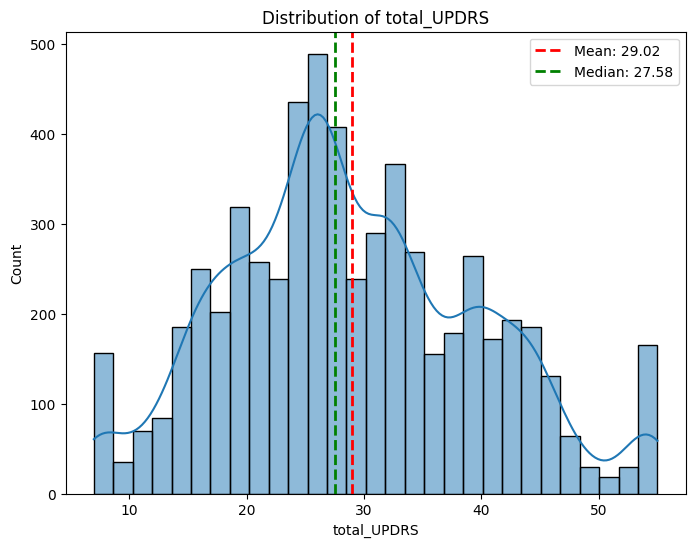

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean and median
mean_total_UPDRS = df['total_UPDRS'].mean()
median_total_UPDRS = df['total_UPDRS'].median()

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['total_UPDRS'], kde=True)
plt.title('Distribution of total_UPDRS')

# Add vertical lines for mean and median
plt.axvline(mean_total_UPDRS, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_total_UPDRS:.2f}')
plt.axvline(median_total_UPDRS, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_total_UPDRS:.2f}')

# Show legend
plt.legend()

# Show the plot
plt.show()


i will set the datas that have total_UPDRS lower han mean (29.02) to be in class 0 and the rest to be in class 1

and i will also drop the motor_updrs column so that i would only have 1 target column.

In [7]:
# Drop 'motor_UPDRS' column
df = df.drop('motor_UPDRS', axis=1)

# Calculate mean of 'total_UPDRS'
mean_total_UPDRS = df['total_UPDRS'].mean()

# Create a new binary column for classification
df['total_UPDRS_class'] = (df['total_UPDRS'] > mean_total_UPDRS).astype(int)

# Drop the original 'total_UPDRS' column
df = df.drop('total_UPDRS', axis=1)

df.head()


,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS_class
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,1
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,1
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,1
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,1
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,1


In [8]:
df.describe()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS_class
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,...,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589,0.453617
std,12.372279,8.821524,0.465656,53.445602,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,...,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498,0.497886
min,1.000000,36.000000,0.000000,-4.262500,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,...,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,0.000000
25%,10.000000,58.000000,0.000000,46.847500,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,...,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340,0.000000
50%,22.000000,65.000000,0.000000,91.523000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,...,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500,0.000000
75%,33.000000,72.000000,1.000000,138.445000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,...,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490,1.000000
max,42.000000,85.000000,1.000000,215.490000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,...,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject#           5875 non-null   int64  
 1   age                5875 non-null   int64  
 2   sex                5875 non-null   int64  
 3   test_time          5875 non-null   float64
 4   Jitter(%)          5875 non-null   float64
 5   Jitter(Abs)        5875 non-null   float64
 6   Jitter:RAP         5875 non-null   float64
 7   Jitter:PPQ5        5875 non-null   float64
 8   Jitter:DDP         5875 non-null   float64
 9   Shimmer            5875 non-null   float64
 10  Shimmer(dB)        5875 non-null   float64
 11  Shimmer:APQ3       5875 non-null   float64
 12  Shimmer:APQ5       5875 non-null   float64
 13  Shimmer:APQ11      5875 non-null   float64
 14  Shimmer:DDA        5875 non-null   float64
 15  NHR                5875 non-null   float64
 16  HNR                5875 

In [10]:
df.total_UPDRS_class.value_counts()

total_UPDRS_class
0    3210
1    2665
Name: count, dtype: int64

**splitting into test and train:**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["total_UPDRS_class"], axis=1),
                                                    df["total_UPDRS_class"],
                                                    test_size=0.3, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_standardized = scaler.fit_transform(X_train)
test_data_standardized = scaler.transform(X_test)

In [13]:
df.describe()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS_class
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,...,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589,0.453617
std,12.372279,8.821524,0.465656,53.445602,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,...,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498,0.497886
min,1.000000,36.000000,0.000000,-4.262500,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,...,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,0.000000
25%,10.000000,58.000000,0.000000,46.847500,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,...,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340,0.000000
50%,22.000000,65.000000,0.000000,91.523000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,...,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500,0.000000
75%,33.000000,72.000000,1.000000,138.445000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,...,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490,1.000000
max,42.000000,85.000000,1.000000,215.490000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,...,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,1.000000


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import clone
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a function for model evaluation
def evaluate_model(model, X, y):
    # Cross-validation with 5 folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X, y, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X, y, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

    # Track the best model based on average accuracy
    best_model_index = np.argmax(accuracy_scores)
    best_model = clone(model)  # Initialize with the first model
    best_accuracy = accuracy_scores[best_model_index]

    for i, (accuracy, model_instance) in enumerate(zip(accuracy_scores, cv.split(X, y))):
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = clone(model)

    # Calculate average scores
    avg_accuracy = np.mean(accuracy_scores)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)

    return {'avg_accuracy': avg_accuracy,
            'avg_precision': avg_precision,
            'avg_recall': avg_recall,
            'avg_f1': avg_f1,
            'best_model': best_model} #out of the 5 models in 5 fold, we will
                                      #use the one with best accuracy to predict
                                      #test set and draw confusion matrix



Decision Tree:
Average Accuracy: 0.9907578055479183
Average Precision: 0.9914438043282379
Average Recall: 0.9887700534759357
Average F1 Score: 0.9914595079831086
Parameters: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}

Decision Tree Test Set Accuracy: 0.9920589903573455


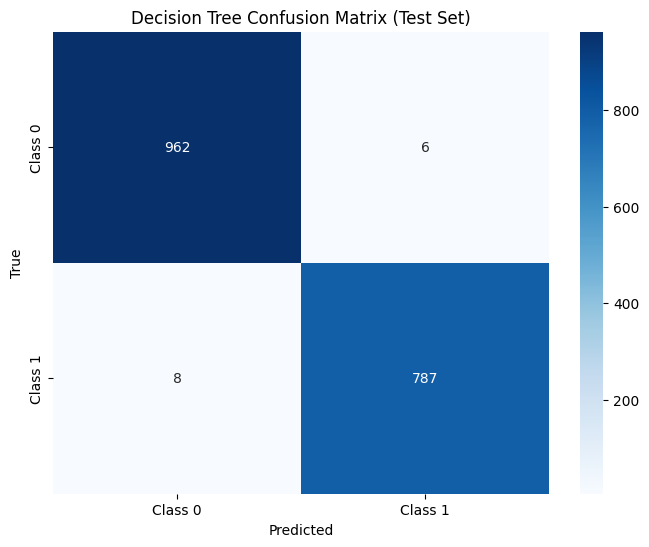

In [16]:
# Decision Tree
dt_params = {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
dt_model = DecisionTreeClassifier(**dt_params)
dt_results = evaluate_model(dt_model, X_train, y_train)

print("\nDecision Tree:")
print(f"Average Accuracy: {dt_results['avg_accuracy']}")
print(f"Average Precision: {dt_results['avg_precision']}")
print(f"Average Recall: {dt_results['avg_recall']}")
print(f"Average F1 Score: {dt_results['avg_f1']}")
print(f"Parameters: {dt_params}")

# Evaluate the best Decision Tree model on the test set and plot confusion matrix
best_dt_model = dt_results['best_model']
best_dt_model.fit(X_train, y_train)
y_dt_pred = best_dt_model.predict(X_test)

# Calculate and print accuracy on the test set
dt_test_accuracy = accuracy_score(y_test, y_dt_pred)
print(f"\nDecision Tree Test Set Accuracy: {dt_test_accuracy}")

# Plot confusion matrix for Decision Tree on the test set
dt_cm = confusion_matrix(y_test, y_dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix (Test Set)')
plt.show()


Random Forest:
Average Accuracy: 0.9669280095076761
Average Precision: 0.9574659032073987
Average Recall: 0.974331550802139
Average F1 Score: 0.9660674815841809
Parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}

Random Forest Test Set Accuracy: 0.9642654566080544


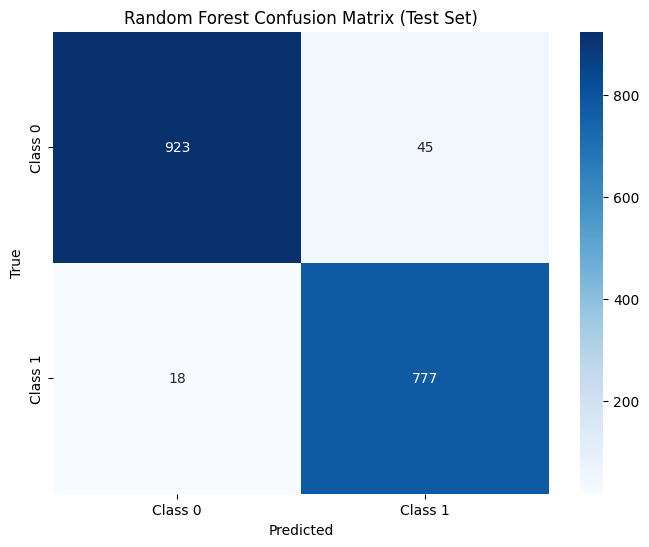

In [19]:
# Random Forest
rf_params = {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}
rf_model = RandomForestClassifier(**rf_params)
rf_results = evaluate_model(rf_model, X_train, y_train)

print("\nRandom Forest:")
print(f"Average Accuracy: {rf_results['avg_accuracy']}")
print(f"Average Precision: {rf_results['avg_precision']}")
print(f"Average Recall: {rf_results['avg_recall']}")
print(f"Average F1 Score: {rf_results['avg_f1']}")
print(f"Parameters: {rf_params}")

# Evaluate the best Random Forest model on the test set and plot confusion matrix
best_rf_model = rf_results['best_model']
best_rf_model.fit(X_train, y_train)
y_rf_pred = best_rf_model.predict(X_test)

# Calculate and print accuracy on the test set
rf_test_accuracy = accuracy_score(y_test, y_rf_pred)
print(f"\nRandom Forest Test Set Accuracy: {rf_test_accuracy}")

# Plot confusion matrix for Random Forest on the test set
rf_cm = confusion_matrix(y_test, y_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.show()



XGBoost:
Average Accuracy: 0.9934333176645882
Average Precision: 0.9914850535881048
Average Recall: 0.9941176470588236
Average F1 Score: 0.9927960703625717
Parameters: {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 5}

XGBoost Test Set Accuracy: 0.9943278502552467


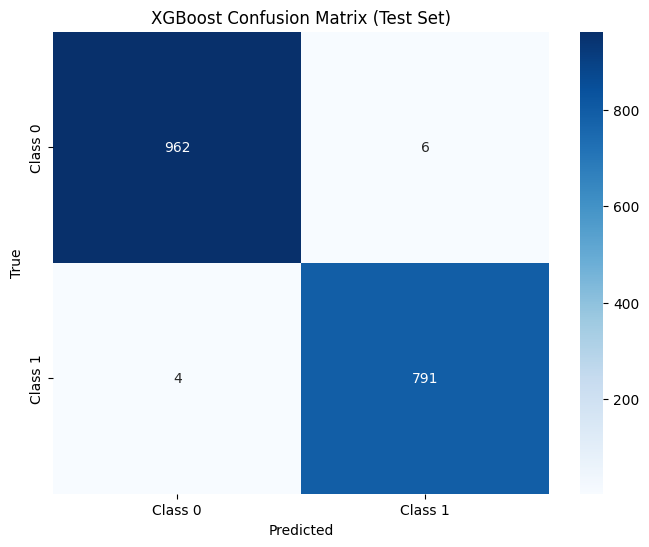

In [21]:
# XGBoost
xgb_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 5}
xgb_model = XGBClassifier(**xgb_params)
xgb_results = evaluate_model(xgb_model, X_train, y_train)

print("\nXGBoost:")
print(f"Average Accuracy: {xgb_results['avg_accuracy']}")
print(f"Average Precision: {xgb_results['avg_precision']}")
print(f"Average Recall: {xgb_results['avg_recall']}")
print(f"Average F1 Score: {xgb_results['avg_f1']}")
print(f"Parameters: {xgb_params}")

# Evaluate the best XGBoost model on the test set and plot confusion matrix
best_xgb_model = xgb_results['best_model']
best_xgb_model.fit(X_train, y_train)
y_xgb_pred = best_xgb_model.predict(X_test)

# Calculate and print accuracy on the test set
xgb_test_accuracy = accuracy_score(y_test, y_xgb_pred)
print(f"\nXGBoost Test Set Accuracy: {xgb_test_accuracy}")

# Plot confusion matrix for XGBoost on the test set
xgb_cm = confusion_matrix(y_test, y_xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix (Test Set)')
plt.show()


SVM:
Average Accuracy: 0.944066128016603
Average Precision: 0.947305786886281
Average Recall: 0.9288770053475937
Average F1 Score: 0.9378972208034261
Parameters: {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}

SVM Test Set Accuracy: 0.9625638116846285


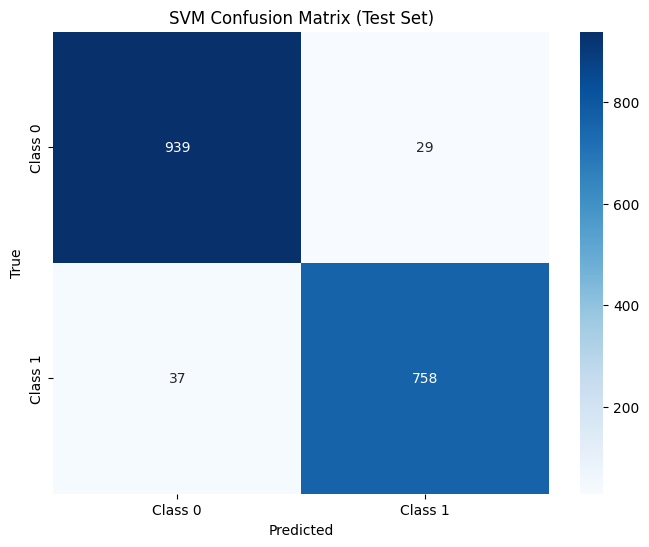

In [19]:
# SVM
svm_params = {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}
svm_model = SVC(**svm_params)
svm_results = evaluate_model(svm_model, X_train, y_train)


print("\nSVM:")
print(f"Average Accuracy: {svm_results['avg_accuracy']}")
print(f"Average Precision: {svm_results['avg_precision']}")
print(f"Average Recall: {svm_results['avg_recall']}")
print(f"Average F1 Score: {svm_results['avg_f1']}")
print(f"Parameters: {svm_params}")

# Evaluate the best SVM model on the test set and plot confusion matrix
best_svm_model = svm_results['best_model']
best_svm_model.fit(X_train, y_train)
y_svm_pred = best_svm_model.predict(X_test)

# Calculate and print accuracy on the test set
svm_test_accuracy = accuracy_score(y_test, y_svm_pred)
print(f"\nSVM Test Set Accuracy: {svm_test_accuracy}")

# Plot confusion matrix for SVM on the test set
svm_cm = confusion_matrix(y_test, y_svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix (Test Set)')
plt.show()


MLP:
Average Accuracy: 0.9100238578815265
Average Precision: 0.9088802111865387
Average Recall: 0.9256684491978608
Average F1 Score: 0.8879476441535973
Parameters: {'hidden_layer_sizes': (200, 100), 'alpha': 0.0001, 'max_iter': 500}

MLP Test Set Accuracy: 0.973908111174135


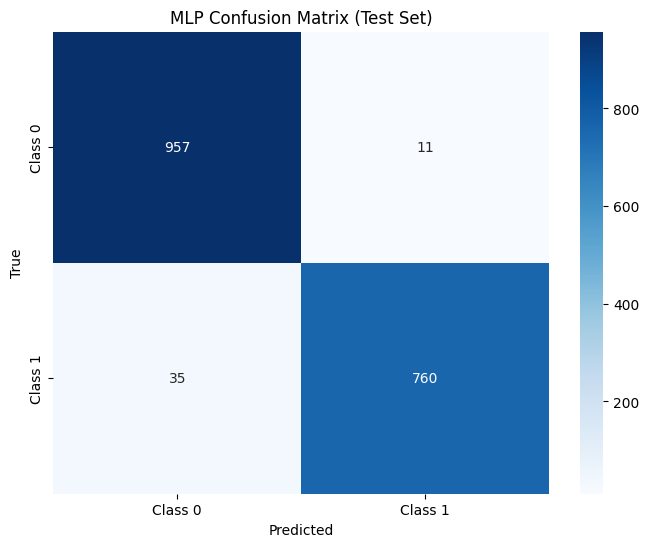

In [28]:
# MLP
mlp_params = {'hidden_layer_sizes': (200, 100), 'alpha': 0.0001, 'max_iter': 500}
mlp_model = MLPClassifier(**mlp_params)
mlp_results = evaluate_model(mlp_model, X_train, y_train)

print("\nMLP:")
print(f"Average Accuracy: {mlp_results['avg_accuracy']}")
print(f"Average Precision: {mlp_results['avg_precision']}")
print(f"Average Recall: {mlp_results['avg_recall']}")
print(f"Average F1 Score: {mlp_results['avg_f1']}")
print(f"Parameters: {mlp_params}")

# Evaluate the best MLP model on the test set and plot confusion matrix
best_mlp_model = mlp_results['best_model']
best_mlp_model.fit(X_train, y_train)
y_mlp_pred = best_mlp_model.predict(X_test)

# Calculate and print accuracy on the test set
mlp_test_accuracy = accuracy_score(y_test, y_mlp_pred)
print(f"\nMLP Test Set Accuracy: {mlp_test_accuracy}")

# Plot confusion matrix for MLP on the test set
mlp_cm = confusion_matrix(y_test, y_mlp_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('MLP Confusion Matrix (Test Set)')
plt.show()